In [18]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline # Jupyter notebook用

UsageError: unrecognized arguments: # Jupyter notebook用


In [4]:
X_train = pd.read_csv('../data/X_train.csv',index_col=0,header=0)

In [6]:
X_train.reset_index(inplace=True, drop=True)

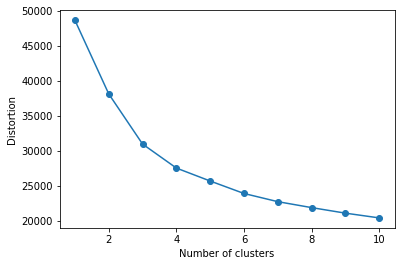

In [19]:
distortions = []

for i  in range(1,11):                # 1~10クラスタまで一気に計算 
    km = KMeans(n_clusters=i,
                init='k-means++',     # k-means++法によりクラスタ中心を選択
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X_train)                         # クラスタリングの計算を実行
    distortions.append(km.inertia_)   # km.fitするとkm.inertia_が得られる

plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()


In [48]:
     # セントロイドの初期化に用いる乱数発生器の状態
y_km = km.fit_predict(X_train)

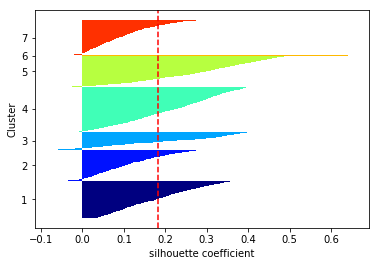

In [49]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm

cluster_labels = np.unique(y_km)       # y_kmの要素の中で重複を無くす
n_clusters=cluster_labels.shape[0]     # 配列の長さを返す。つまりここでは n_clustersで指定した3となる

# シルエット係数を計算
silhouette_vals = silhouette_samples(X_train,y_km,metric='euclidean')  # サンプルデータ, クラスター番号、ユークリッド距離でシルエット係数計算
y_ax_lower, y_ax_upper= 0,0
yticks = []

for i,c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km==c]      # cluster_labelsには 0,1,2が入っている（enumerateなのでiにも0,1,2が入ってる（たまたま））
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)              # サンプルの個数をクラスターごとに足し上げてy軸の最大値を決定
        color = cm.jet(float(i)/n_clusters)               # 色の値を作る
        plt.barh(range(y_ax_lower,y_ax_upper),            # 水平の棒グラフのを描画（底辺の範囲を指定）
                         c_silhouette_vals,               # 棒の幅（1サンプルを表す）
                         height=1.0,                      # 棒の高さ
                         edgecolor='none',                # 棒の端の色
                         color=color)                     # 棒の色
        yticks.append((y_ax_lower+y_ax_upper)/2)          # クラスタラベルの表示位置を追加
        y_ax_lower += len(c_silhouette_vals)              # 底辺の値に棒の幅を追加

silhouette_avg = np.mean(silhouette_vals)                 # シルエット係数の平均値
plt.axvline(silhouette_avg,color="red",linestyle="--")    # 係数の平均値に破線を引く 
plt.yticks(yticks,cluster_labels + 1)                     # クラスタレベルを表示
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')
plt.show()

In [58]:
km = KMeans(n_clusters=7,            
            init='k-means++',        
            n_init=10,               
            max_iter=300,            
            tol=1e-04,               
            random_state=0) 
df_cluster = pd.DataFrame(km.fit_predict(X_train),columns=['cluster'])
df_dis = pd.DataFrame(km.fit_transform(X_train),columns=[ 'distance'+str(x) for x in range(len(km.fit_transform(X_train)[0]))])
df_right = pd.merge(df_cluster,df_dis,left_index=True,right_index=True)
X_train = pd.merge(X_train,df_right, left_index=True,right_index=True)

In [64]:
pd.get_dummies(X_train,columns=['cluster'])

,pH,alcohol,volatile.acidity,density,free.sulfur.dioxide,citric.acid,chlorides,total.sulfur.dioxide,residual.sugar,fixed.acidity,...,distance4,distance5,distance6,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6
0,0.505978,1.760586,0.175455,-1.458013,-0.193486,-1.166493,-0.764287,-0.499285,-0.721482,-0.019138,...,3.655192,12.199066,3.133724,1,0,0,0,0,0,0
1,-0.116877,-0.580347,1.478436,0.656975,-1.428266,-0.958494,0.624080,-1.501365,-0.700531,0.977297,...,1.792458,10.601864,3.617410,0,0,0,0,1,0,0
2,0.194550,1.676982,-0.066960,-1.464622,0.199398,-0.126495,-0.565949,-0.481704,-0.344373,-0.555680,...,4.010358,11.791454,2.728471,1,0,0,0,0,0,0
3,-0.179163,0.422910,-0.612393,-0.975531,-0.698623,1.052170,-0.367610,0.274251,-0.868135,-0.172435,...,4.313091,11.631092,1.447993,0,0,0,0,0,0,1
4,0.879691,1.258958,-0.188167,-0.697939,-0.586371,-0.057162,-0.707619,0.625859,-0.113918,-0.402382,...,4.073233,11.547421,3.378664,0,1,0,0,0,0,0
5,1.128833,0.339306,1.569341,0.141447,-0.361865,-2.137159,0.652414,-1.378303,-0.658630,-0.095787,...,1.296194,10.863112,4.290263,0,0,0,0,1,0,0
6,0.194550,-1.081975,-0.127563,0.590881,0.087145,-0.403828,-0.084270,1.135689,0.598397,-0.249084,...,3.695201,11.347165,2.504548,0,0,0,1,0,0,0
7,-1.175731,-0.078718,-1.036619,-1.054843,0.143272,-0.126495,-0.622617,0.168769,-0.553878,-0.632328,...,4.571082,11.925692,1.365965,0,0,0,0,0,0,1
8,-0.366019,1.091748,-0.491186,-1.421661,-0.389929,-0.403828,-1.047627,-0.762990,-0.721482,-0.325733,...,4.109205,12.432733,2.110957,1,0,0,0,0,0,0
9,0.132265,-0.914765,-1.097223,-0.301379,-0.025107,-0.681161,-0.735953,-0.235579,-0.197720,-1.322168,...,4.227081,12.465132,2.442326,0,1,0,0,0,0,0
